## Intro

Coronavirus pandemic has presented unprecedented challenges to the global health systems. The Saudi government has taking a number of proactive steps to address this crisis. In this report we assess the current situation and advise on whether more aggressive policies need to be deployed.

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


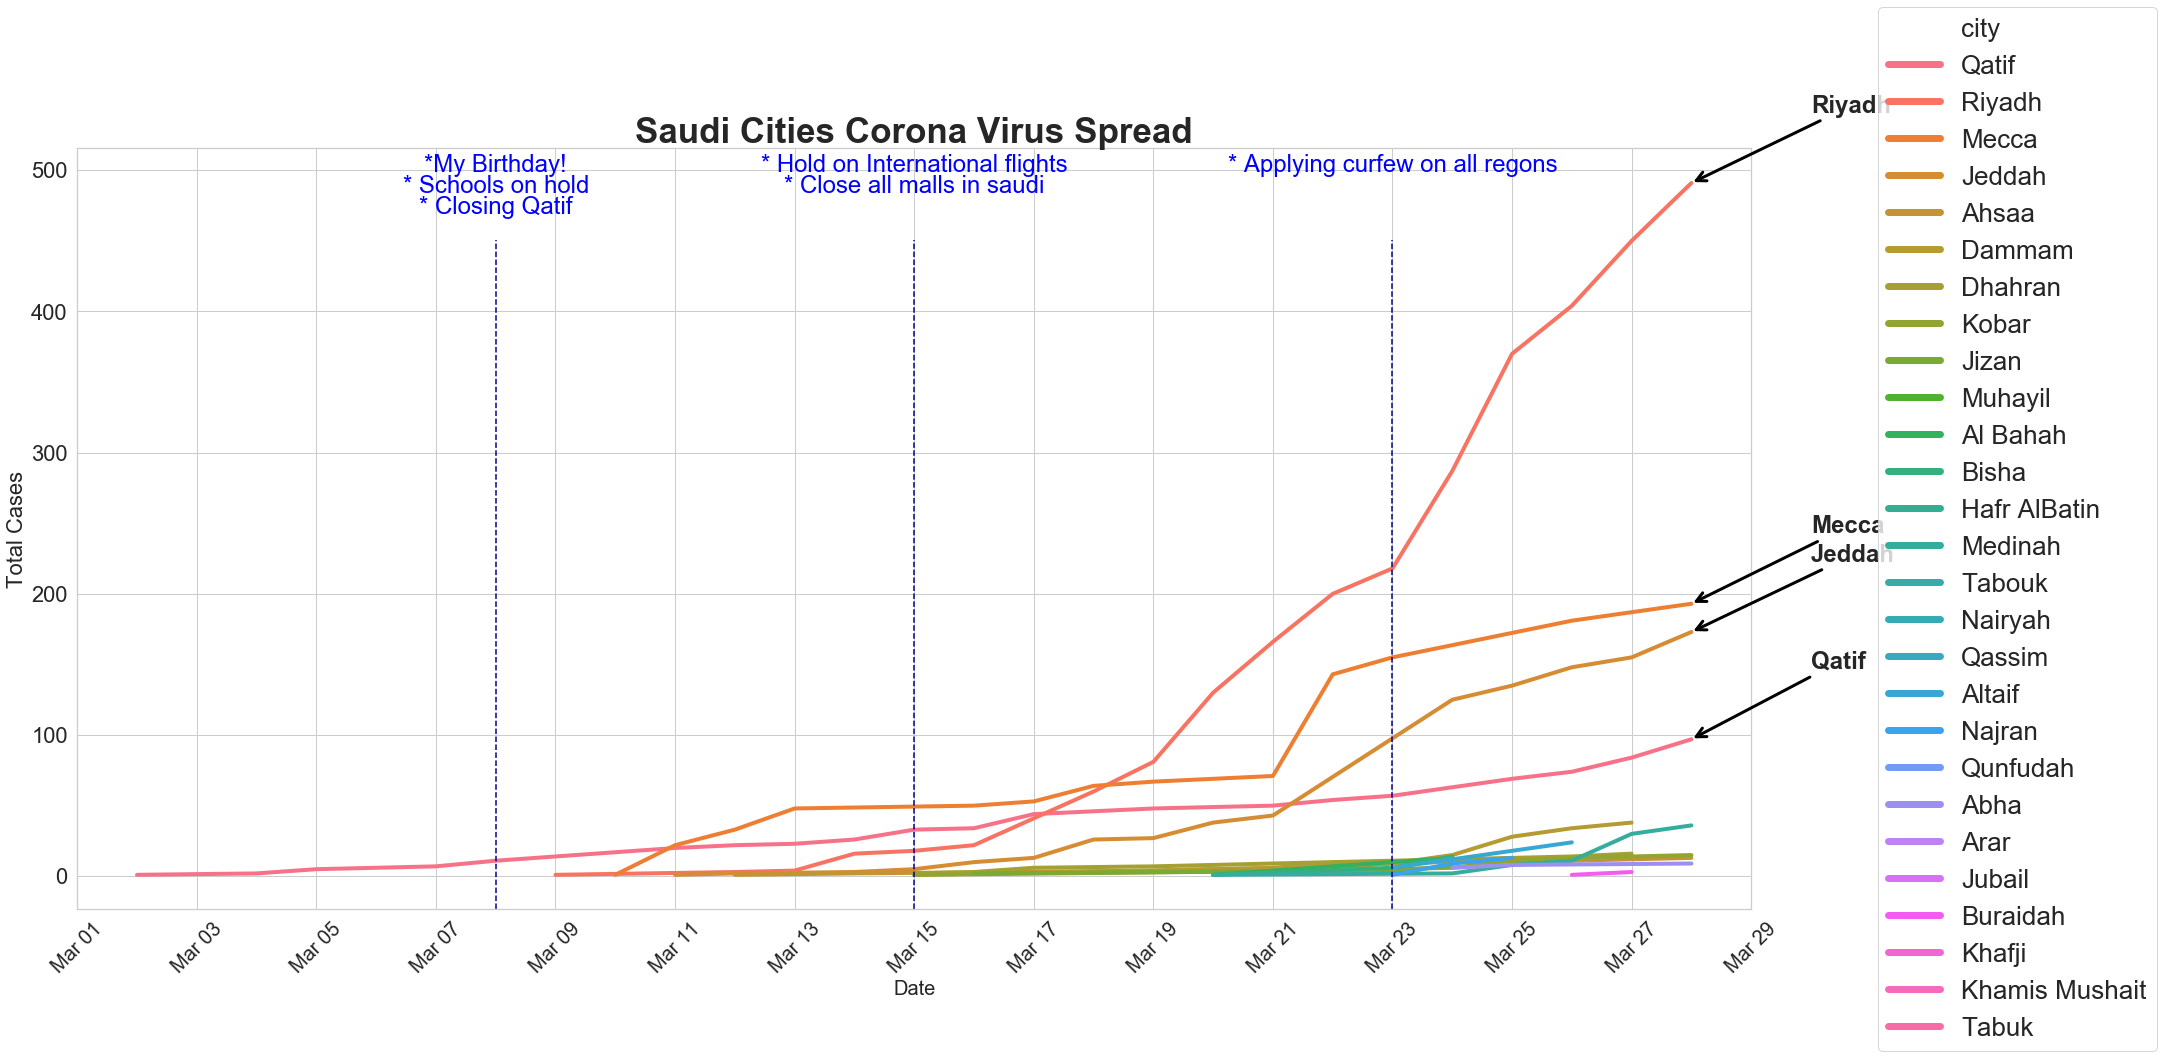

In [1174]:
plt.figure(figsize = (30, 14))
plt.title('Saudi Cities Corona Virus Spread', fontsize = 35, weight='bold')

ax = sns.lineplot(x="date", y="total_cases", hue="city", legend='brief',  data=saudi_cities, linewidth=4)

sns.set(font_scale = 3)
sns.set_style("whitegrid")

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([saudi_cities.date.min() - datetime.timedelta(days=1), saudi_cities.date.max() + datetime.timedelta(days=1)])

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)

for i in range(4):
    ax.annotate(saudi_cities_largest.iloc[i].city, 
                xy=(saudi_cities.date.max(), saudi_cities_largest.iloc[i].total_cases), fontsize=24, weight='bold',
                xytext=(saudi_cities.date.max() + datetime.timedelta(days=2),
                        saudi_cities_largest.iloc[i].total_cases + 50), 
                arrowprops=dict(facecolor='black', arrowstyle="->", color='black', linewidth=3));

for date_point, labels, in important_dates:
    plt.axvline(x=date_point, ls='--', color='darkblue', ymax=0.88)
    i = 0
    for label in labels:
        plt.text(date_point, ax.get_ylim()[1]-12 - (i*15), label,
             horizontalalignment='center',
             verticalalignment='center',
             color='blue',
             fontsize=24
             )
        i = i + 1

leg = ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, prop={'size':26});

for line in leg.get_lines():
    line.set_linewidth(7)

## Change in source of new cases

At the beginning of the crises reported cases were by forign travel. However, as the crisis has progressed and with government travel restriction orders and policy more and more of the new cases are due to virus transmitting within the local population. This can be seen in the plot below:

No handles with labels found to put in legend.


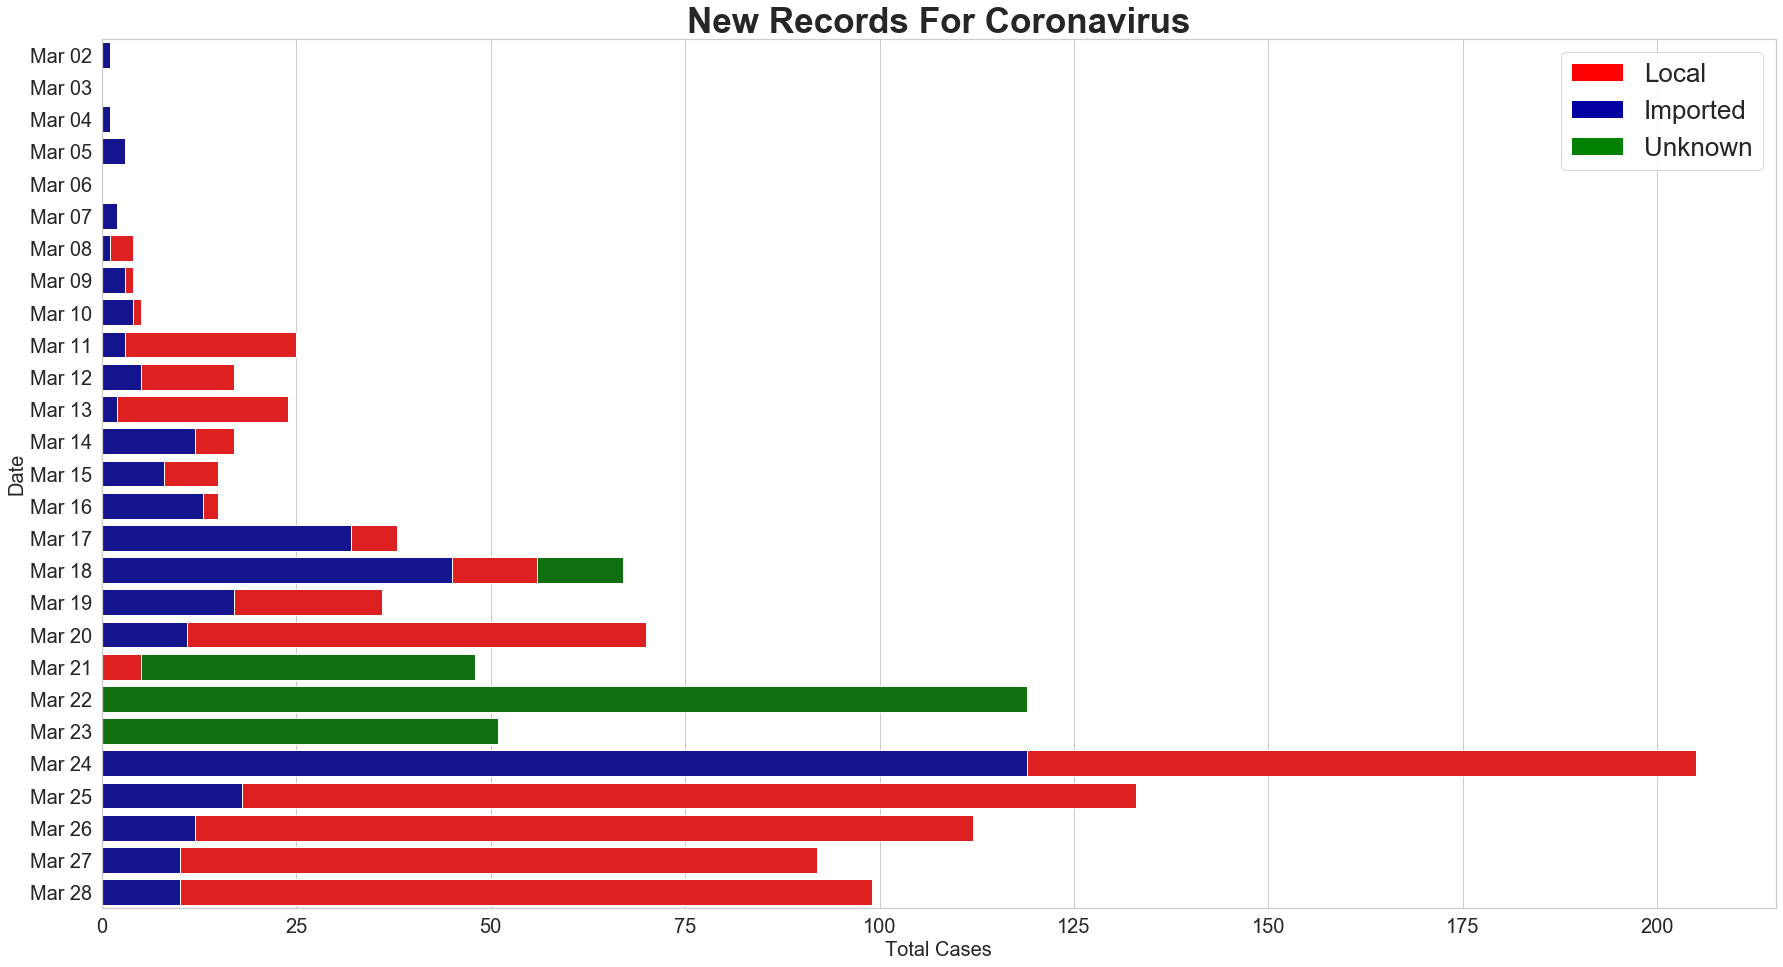

In [1164]:

plt.figure(figsize = (30, 16))
plt.title('New Records For Coronavirus', fontsize = 35, weight='bold')

sns.barplot(y='date', x='new_cases', data=saudi_cases, color='green', orient = 'h')

mid_plot = sns.barplot(y='date', x='local', data=saudi_cases, color='red', orient = 'h')

bottom_plot = sns.barplot(y='date', x='imported', data=saudi_cases, color='#0000A3', orient = 'h')

sns.set(font_scale = 3)
sns.set_style("whitegrid")

plt.yticks(fontsize =20)
plt.xticks(fontsize =20)
plt.ylabel('Date', fontsize =20)
plt.xlabel('Total Cases', fontsize =20)
plt.legend(fontsize=26)

y_dates = saudi_cases['date'].dt.strftime('%b %d').sort_values().unique()
bottom_plot.set_yticklabels(labels=y_dates, ha='right');



top_bar = plt.Rectangle((0, 0), 1, 1, fc='red')
mid_bar = plt.Rectangle((0, 0), 1, 1, fc='#0000A3')
idk = plt.Rectangle((0, 0), 1, 1, fc='green')

plt.legend([top_bar, mid_bar, idk], ['Local', 'Imported', 'Unknown'], loc='upper right', ncol=1, prop={'size':26});



We should continue restriction travel both to nighboring countries and others as the number of cases is sharply increasing.

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


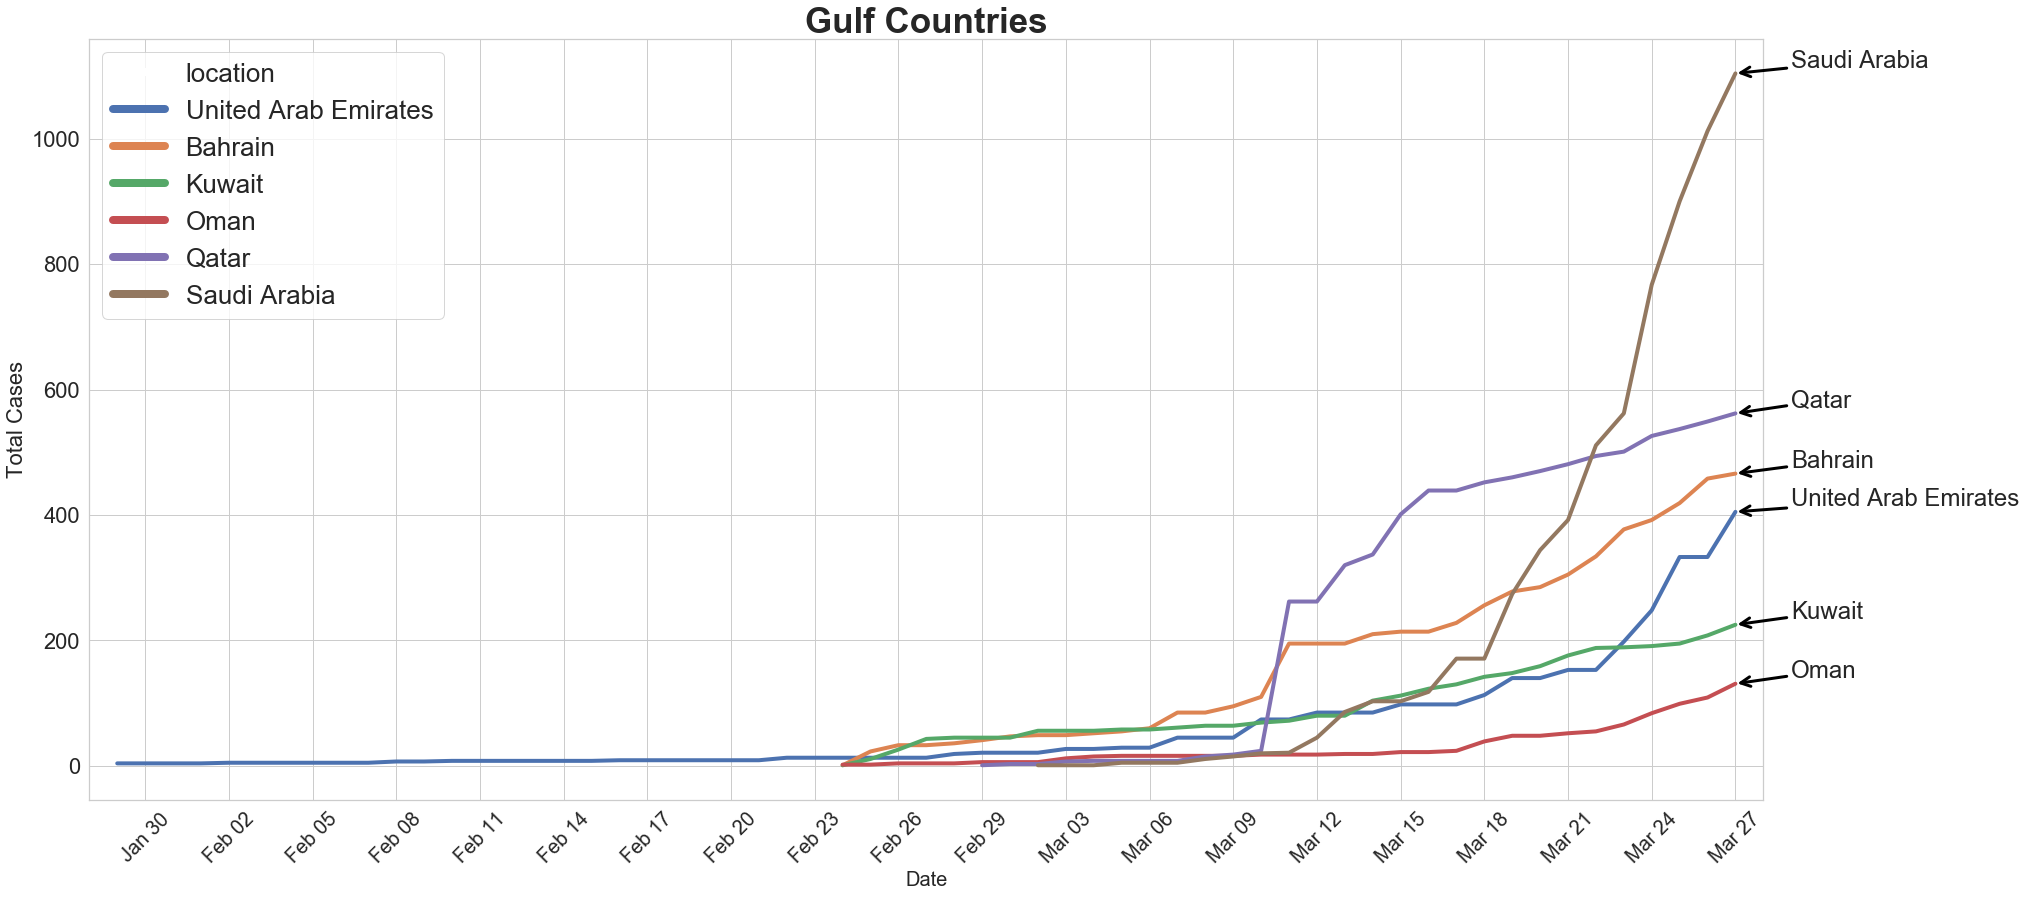

In [1263]:
plt.figure(figsize = (30, 14))
plt.title('Gulf Countries', fontsize = 35, weight='bold')

sns.set_style("whitegrid")
ax = sns.lineplot(x="date", y="total_cases", hue="location",  data=gulf_countries, linewidth=4)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([gulf_countries.date.min() - datetime.timedelta(days=1), gulf_countries.date.max() + datetime.timedelta(days=1)])

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)

plt.xlabel('Date', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=24)

for i in range(gulf_highest.shape[0]):
    ax.annotate(gulf_highest.iloc[i].location, 
                xy=(gulf_countries.date.max(), gulf_highest.iloc[i].total_cases), fontsize=24,
                xytext=(gulf_countries.date.max() + datetime.timedelta(days=2),
                        gulf_highest.iloc[i].total_cases + 10), 
                arrowprops=dict(facecolor='black', arrowstyle="->", color='black', linewidth=3));

leg = ax.legend(ncol=1, prop={'size':26});
for line in leg.get_lines():
    line.set_linewidth(8)

## Effect of Weather

There has been some speculation that the warmer summer months will help in curbing the spread of the Coronavius. To evaluate this possibility we investigated the spread of the virus in the different Chinese. We did not find reliable evidence (as seen below) of higher temperature slowing down the virus. We do caution that this not be taking too serious as the temperatures in the Kingdom during the summer are overall higher than those found in Chinese cities during the months of January to March. As such as we continue into the summer, we advise to take the risk of Coronavirus transmission seriously and continue with social distancing and other precaution pending futher data.

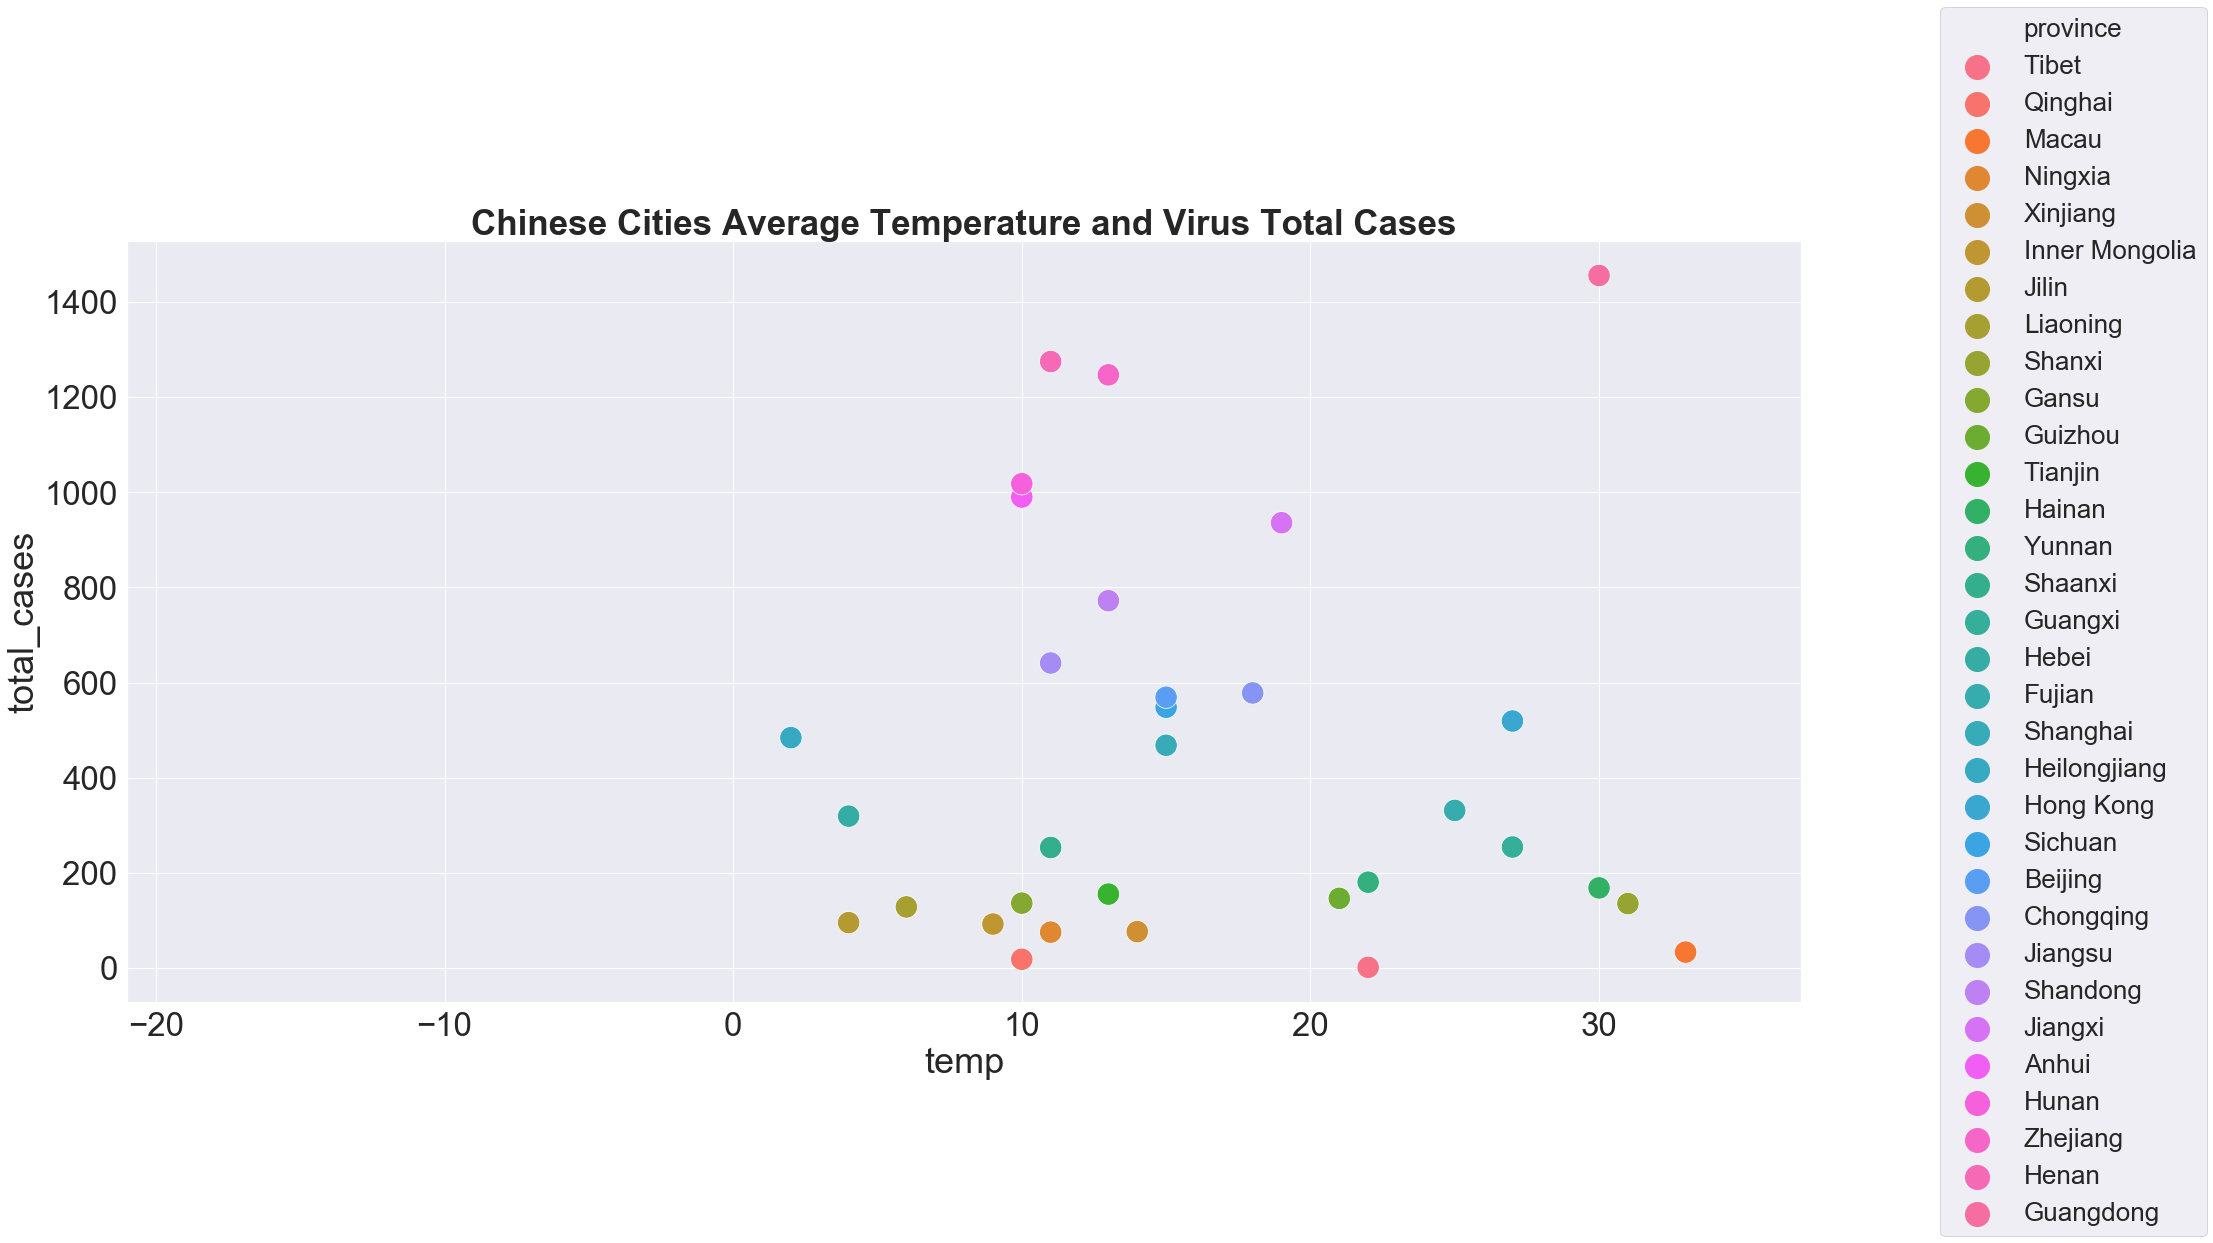

In [1253]:
plt.figure(figsize = (30, 14))
plt.title('Chinese Cities Average Temperature and Virus Total Cases', fontsize=35, weight='bold')

ax = sns.scatterplot(x="temp", y="total_cases", hue="province", legend='full',  data=china_cities[(china_cities['province'] != 'Hubei') & (china_cities.date == china_cities.date.max())], s=500)
sns.set(font_scale = 3)

ax.set_xlim([china_cities.temp.min() - 1, china_cities.temp.max() + 1])
ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, prop={'size':26}, markerscale=4);



## Effects of current policies

Due to fourteen day quarantine period delay, it is still too early to understand how much of an effect stay-in-home and shelter-in-place order as well as city lockdown policies may have. Data shows an exponential increase in cases inline with other countries as can be seen below.

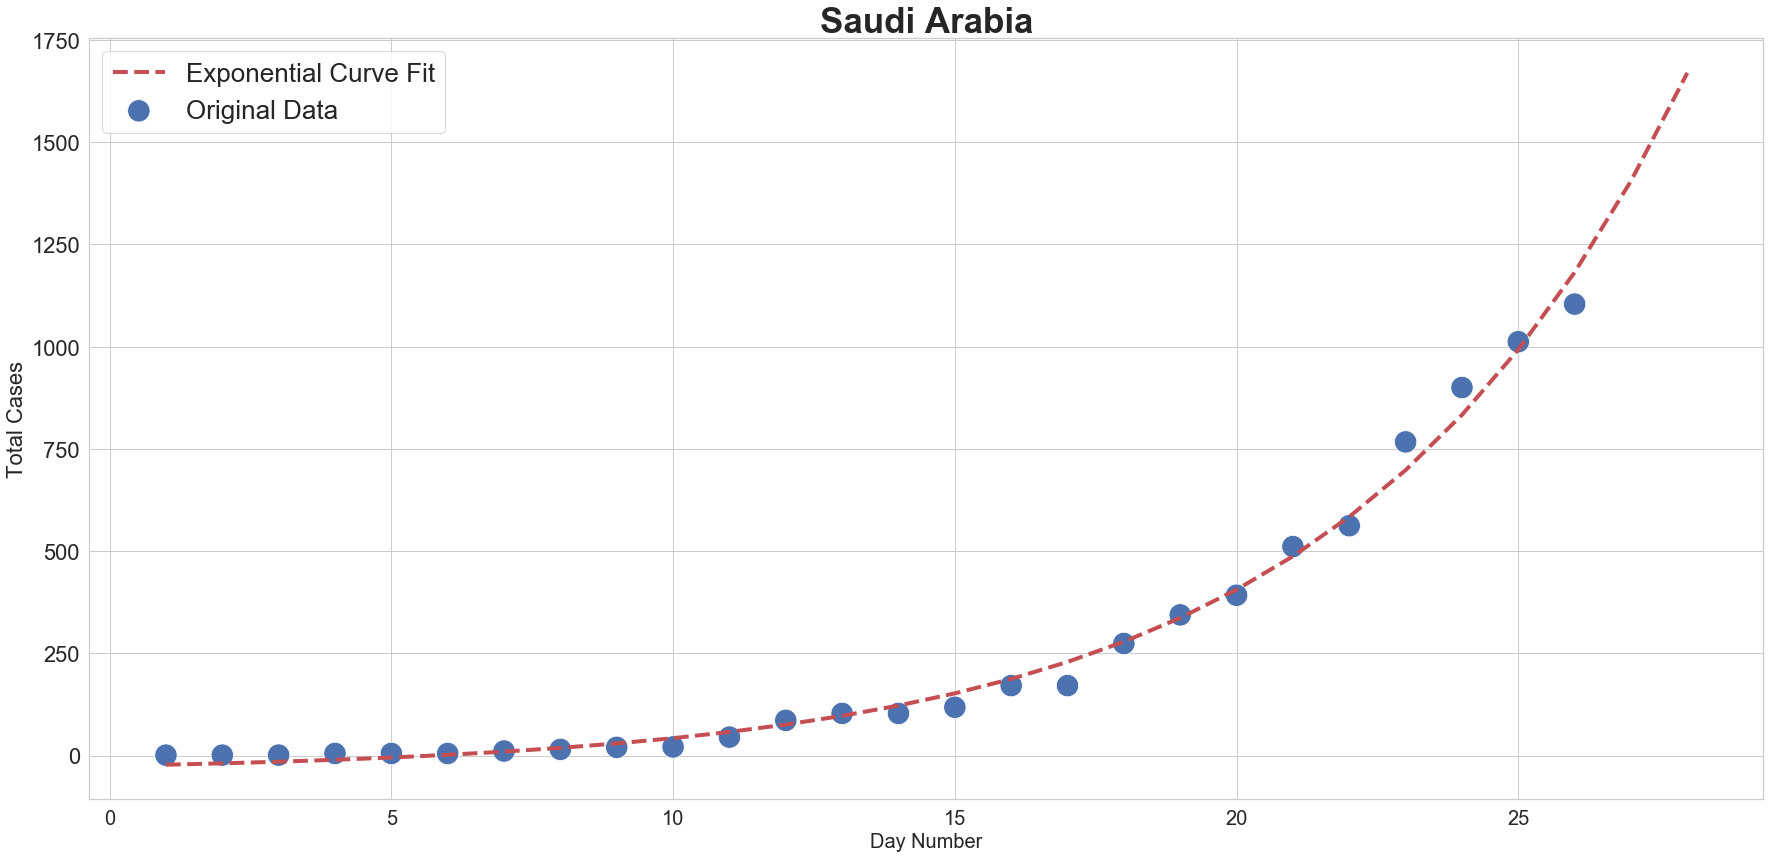

In [1283]:
plt.figure(figsize = (30, 14))
plt.title('Saudi Arabia', fontsize = 35, weight='bold')

ax = sns.scatterplot(x="day_num", y="total_cases", legend=False, hue="location",  data=saudi, s=500, label="Original Data")
sns.set_style("whitegrid")

x = saudi["day_num"].append(pd.Series([26, 27, 28]))
plt.plot(x, exponential(x, *epopt), 'r--', label="Exponential Curve Fit", linewidth=4);

plt.xticks(fontsize =20, )
plt.yticks(fontsize =22)

plt.xlabel('Day Number', fontsize =20)
plt.ylabel('Total Cases', fontsize =22)
plt.legend(fontsize=26);


The goal during this pandemic is as noted by many is to 'flatten the curve'. This can be seen as a dip in the number of new cases. o A look at the weekly new cases by total cases plot we can see that we 

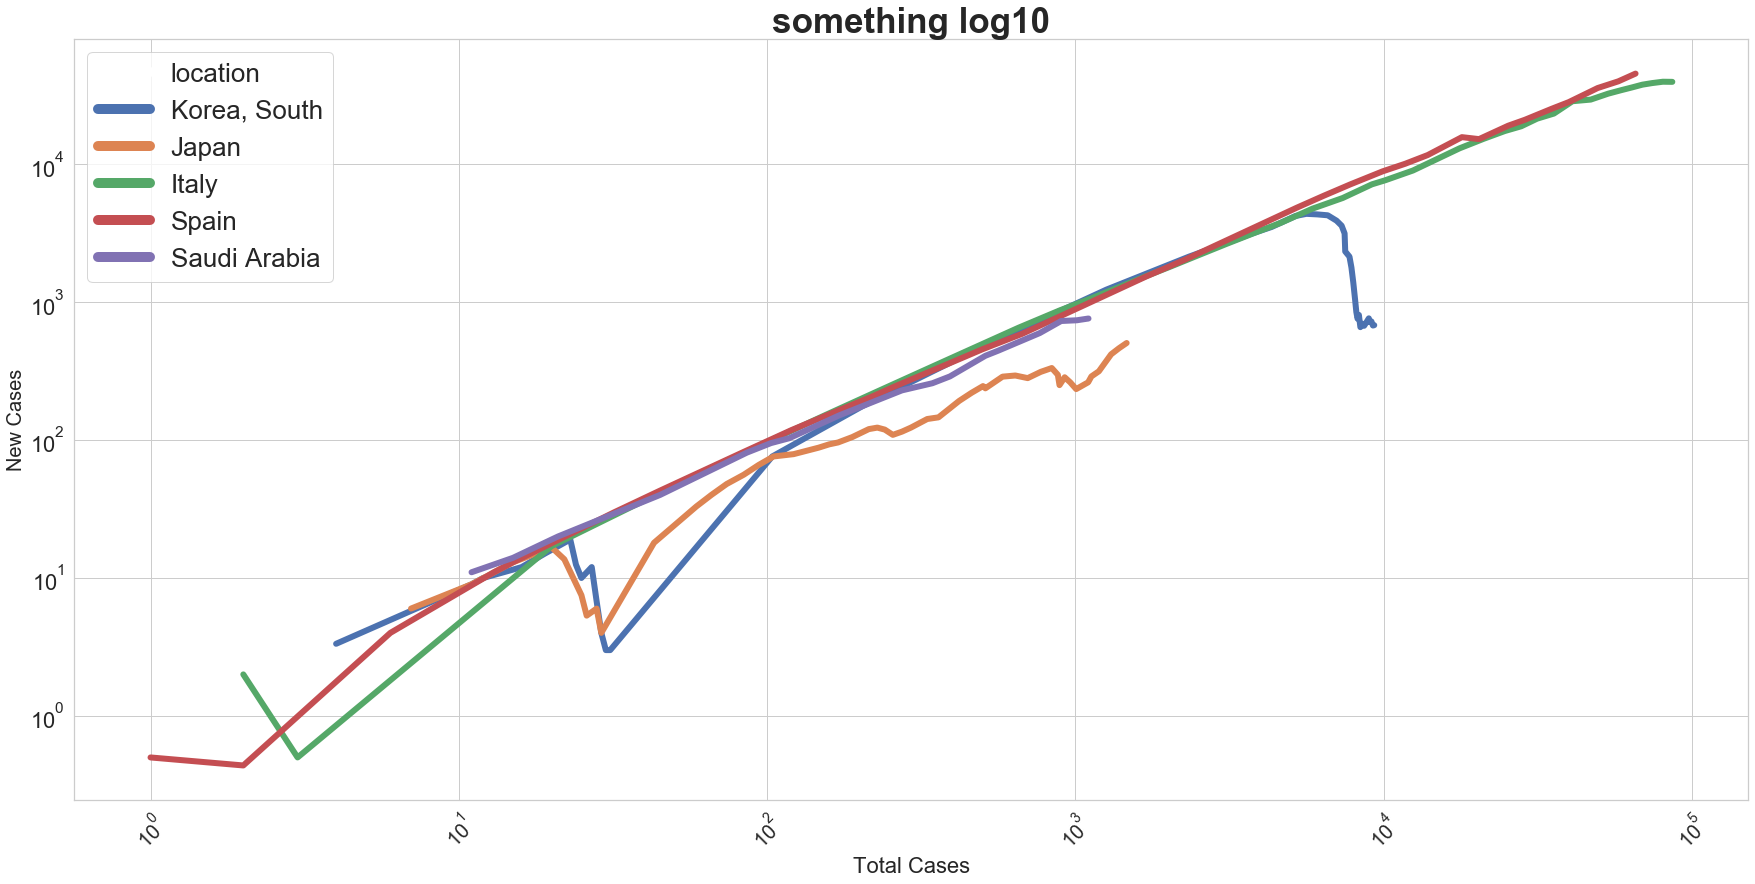

In [1276]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="total_cases", y="new_7day", hue="location", ci=False, legend='full',  data=csikus, linewidth=6 )
ax.set_xscale('log')
ax.set_yscale('log')
sns.set_style("whitegrid")
plt.title('something log10', fontsize = 35, weight='bold')

plt.xticks(fontsize =20, rotation=45)
plt.yticks(fontsize =22)


plt.ylabel('New Cases', fontsize =20)
plt.xlabel('Total Cases', fontsize =22);


leg = ax.legend(prop={'size':26});

for line in leg.get_lines():
    line.set_linewidth(10)

## Travel Restriction Between Regions

We recomend restricting travel between the different regions. In particular those with high num er of cases.

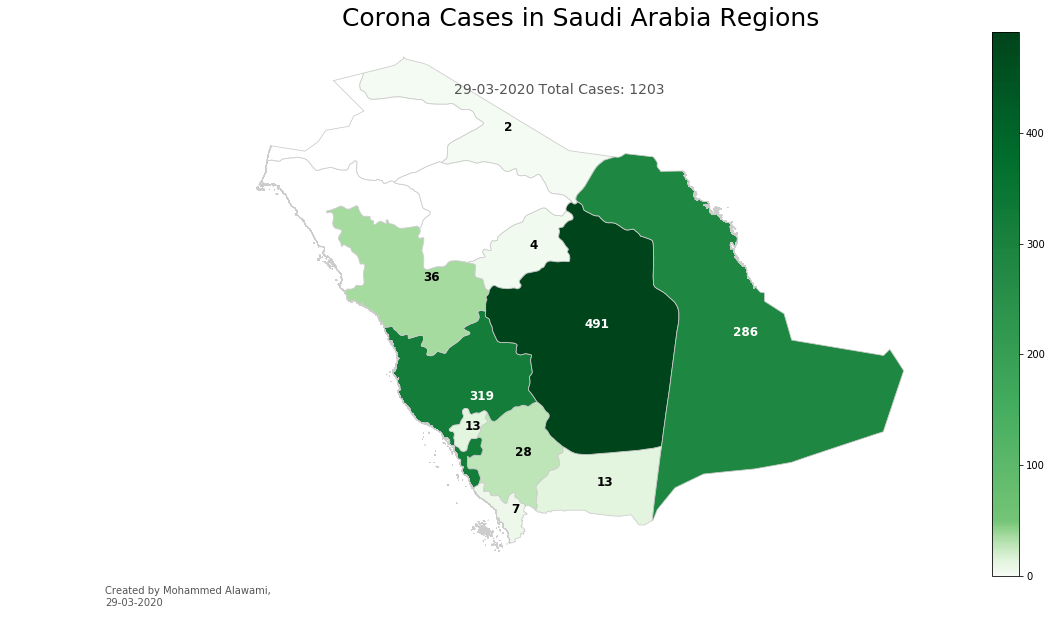

In [226]:
saudi_corona_map["rep"] = saudi_corona_map["geometry"].representative_point()
za_points = saudi_corona_map.copy()
za_points.set_geometry("rep", inplace = True)

variable = 'total_cases'
# set the range for the choropleth
vmin, vmax = saudi_corona_map.total_cases.min(), saudi_corona_map.total_cases.max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))
cmap = 'Greens'

divnorm = colors.DivergingNorm(vmin=0, vcenter=50, vmax=vmax)

saudi_corona_map.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', norm=divnorm, legend=True, missing_kwds={"color": "white"})


texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["total_cases"]):
    if np.isnan(label) == False:
        if label > 50:
            texts.append(plt.text(x, y, int(label), fontsize = 12, weight='bold', color='white'))
        else:
            texts.append(plt.text(x, y, int(label), fontsize = 12, weight='bold', color='Black'))

ax.axis('off');

# add a title
title = 'Corona Cases in Saudi Arabia Regions'
ax.set_title(title, 
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# ax.set_xlabel(today, fontsize=10)
ax.annotate(today,
           xy=(.47, 0.87), xycoords='figure fraction',
           horizontalalignment='center', verticalalignment='top',
           fontsize=14, color='#555555')

ann = ' Total Cases: {}'.format(sum(saudi_province.total_cases))
ax.annotate(ann,
           xy=(.57, 0.87), xycoords='figure fraction',
           horizontalalignment='center', verticalalignment='top',
           fontsize=14, color='#555555')

# create an annotation for the  data source
ann = 'Created by Mohammed Alawami, \n{}'.format(today)
ax.annotate(ann,
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')





plt.show()

fig.savefig('saudimap.png', dpi=300)

## Hospital Capacity

One of the concerns with the Coronavirus is the large number of cases that can overwhelm the hospital system. We use CDC estimates as well as Saudi census data and health datasets on the number of hosptial beds to estimate the number of cases before we reach full hospital capacity. This assumes hospitalization of only cases that need medical attention. The estimates for the proportion or available hospital beds for Corona cases is fourth of the hospital bed. Our estimates indicate that we should expect 1.19% of all Coronavirus cases to require hospitalization. Therefore, we estimate that we'll be at full capacity when we we have 6423 to 9176 Corona cases (note this is the number of present cases and not the reported total cases. That is total cases - recovered cases - fatalities). Furthermore, we estimate ICU rate of 0.22% to 0.45% and fatality rates of 0.03% to 0.05%.

No handles with labels found to put in legend.


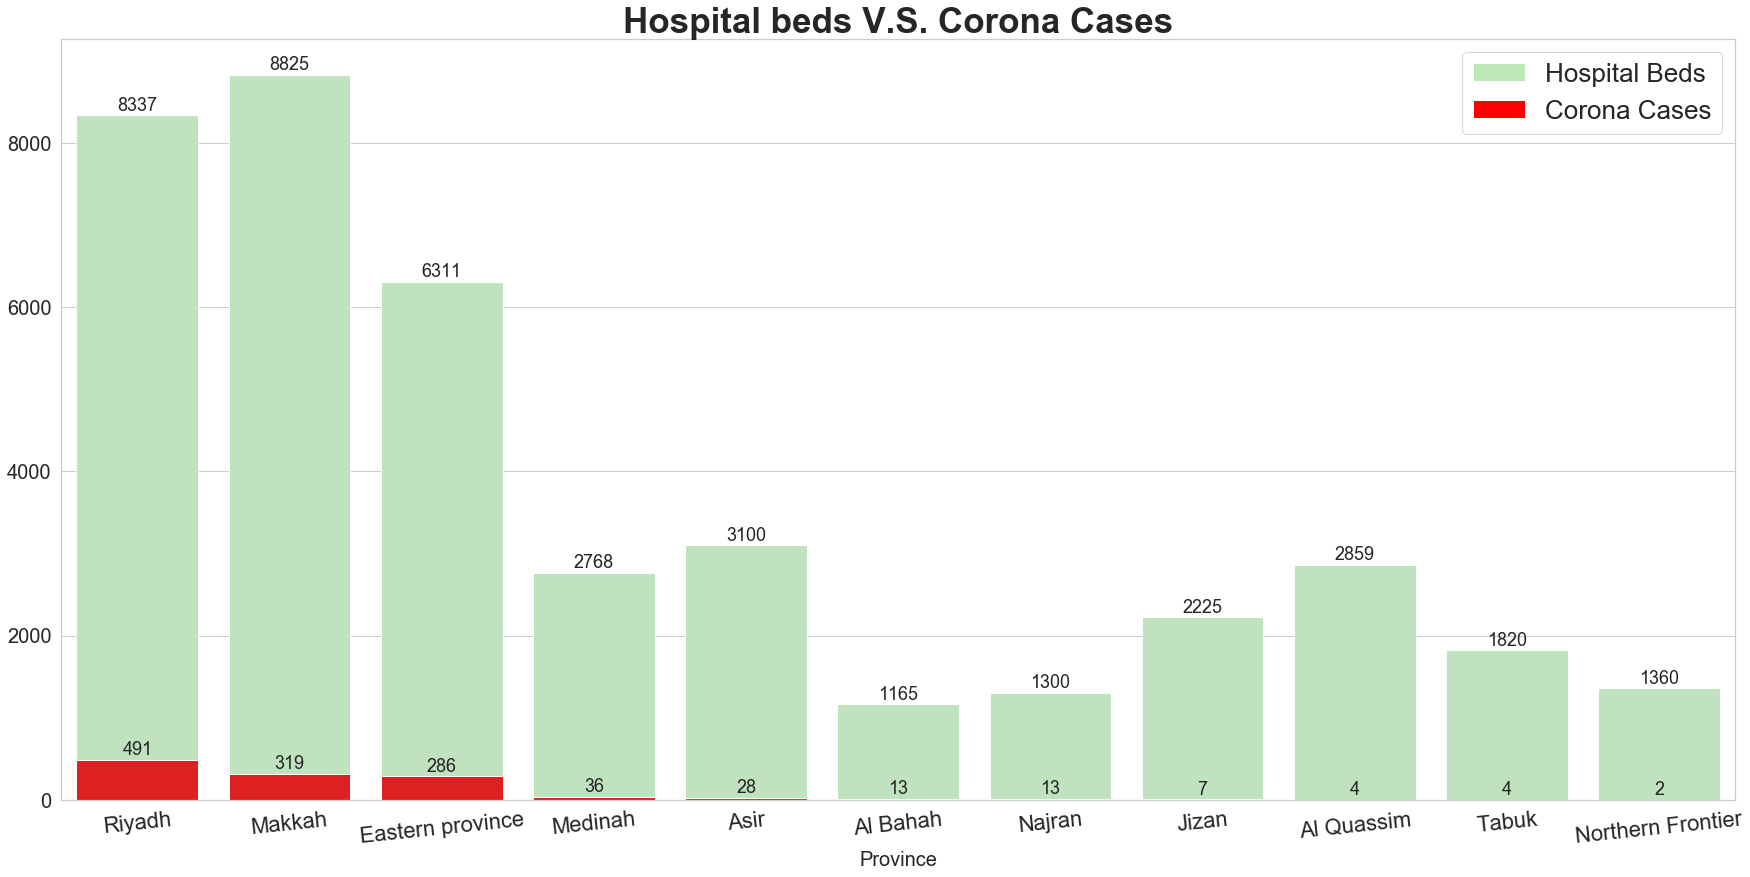

In [1271]:
plt.figure(figsize = (30, 14))

plt.title('Hospital beds V.S. Corona Cases', fontsize = 35, weight='bold')
sns.set_style("whitegrid")

ax = sns.barplot(x='province', y="hospital_beds", data=province_hospital, color='#BCE8B8')

sns.barplot(x='province', y="total_cases", data=province_hospital, color='red')


sns.set(font_scale = 1.5)
sns.set_style("whitegrid")

plt.xticks(fontsize =22, rotation=6)
plt.yticks(fontsize =20)

plt.xlabel('Province', fontsize =20)
plt.ylabel('', fontsize =22)
plt.legend(fontsize=24, loc='upper right')
cases = plt.Rectangle((0, 0), 1, 1, fc='red')
hosp_space = plt.Rectangle((0, 0), 1, 1, fc='#BCE8B8')

plt.legend([hosp_space, cases], ['Hospital Beds', 'Corona Cases'], loc='upper right', ncol=1, prop={'size':26});

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Data Sources and References

